## linear regression


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
# Read the 2015-2016 wave of NHANES data
da = pd.read_csv("nhanes_2015_2016.csv")
# Drop unused columns, and drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

WE start with a simple linear regression model with only one covariate, age, predicting SBP. In the
NHANES data, the variable BPXSY1 contains the first recorded measurement of SBP for a subject,
and RIDAGEYR is the subject’s age in years. The model that is fit in the next cell expresses the
expected SBP as a linear function of age:

In [3]:
model= sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.09e-259
Time:                        22:46:42   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This fitted model implies that when comparing two people whose ages differ by one year, the
older person will on average have 0.48 units higher SBP than the younger person. This difference
is statistically significant, based on the p-value shown under the column labeled P>|t|. This
means that there is strong evidence that there is a real association between between systolic blood
pressure and age in this population.


In [4]:
da.BPXSY1.std()

18.486559500781865

The standard deviation of around 18.5


In [5]:
cc = da[["BPXSY1", "RIDAGEYR"]].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.20715459625188243


In the case of regression with a single independent variable,there is a very close
correspondence between the regression analysis and a Pearson correlation analysis,. The primary summary statistic for assessing the strength of a
predictive relationship in a regression model is the R-squared, which is shown to be 0.207 in the
regression output and also calculated above
. This means that 21% of the variation in SBP is explained by age.

Above we considered a simple linear regression analysis with only one covariate (age) predicting
systolic blood pressure (SBP).Now we are adding one more covariate that is Gender as it is expected to have some effect on SBP. The NHANES variable for gender is named
RIAGENDR

In [6]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [7]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.87e-268
Time:                        23:10:30   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model that was fit above uses both age and gender to explain the variation in SBP. It finds
that two people with the same gender whose ages differ by one year tend to have blood pressure
values differing by 0.47 units, which is essentially the same age parameter that we found above in
the model based on age alone. This model also shows us that comparing a man and a woman of
the same age, the man will on average have 3.23 units greater SBP.

In [8]:
# We need to use the original, numerical version of the gender
# variable to calculate the correlation coefficient.
da[["RIDAGEYR", "RIAGENDR"]].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


Above we confirm that gender and age are nearly uncorrelated in this data set (the correlation
of around -0.02 is negligible). Thus, it is expected that when we add gender to the model, the age
coefficient is unaffected.

In [9]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0, 1]**2)

0.21478581086243773


We take the r-squared value again

Next we add a third variable, body mass index (BMI), to the model predicting SBP. BMI is a
measure that is used to assess if a person has healthy weight given their height. BMXBMI is the
NHANES variable containing the BMI value for each subject.

In [10]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          8.54e-286
Time:                        23:15:03   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BMI is positively associated with SBP. Given two subjects with the same
gender and age, and whose BMI differs by 1 unit, the person with greater BMI will have, on
average, 0.31 units greater systolic blood pressure (SBP). Also note that after adding BMI to the
model, the coefficient for gender became somewhat greater. This is due to the fact that the three
covariates in the model, age, gender, and BMI, are mutually correlated, which is proved below

In [11]:
da[["RIDAGEYR", "RIAGENDR", "BMXBMI"]].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.021398,0.023089
RIAGENDR,-0.021398,1.000000,0.080463
BMXBMI,0.023089,0.080463,1.000000


now we graphically represent the regression model for better understanding


We start with plots that allow us to visualize the fitted regression function, that is, the mean
systolic blood pressure expressed as a function of the covariates. These plots help to show the
estimated role of one variable when the other variables are held fixed. We will also plot 95%
simultaneous confidence bands around these fitted lines. Although the estimated mean curve is never
exact based on a finite sample of data, we can be 95% confident that the true mean curve falls
somewhere within the shaded regions of the plots below

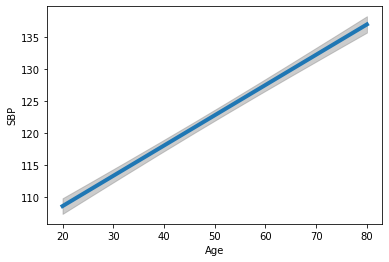

In [12]:
from statsmodels.sandbox.predict_functional import predict_functional
# Fix certain variables at reference values. Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
"DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}
# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")


the graphs above show the rela-
tionship between expected SBP and age for women with BMI equal to 25

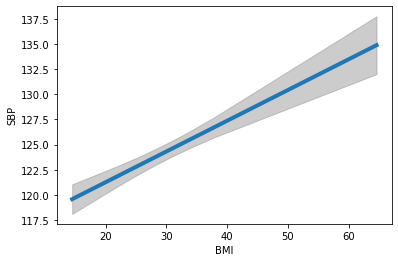

In [16]:
values["RIDAGEYR"] = 50
pr, cb, fv = predict_functional(result, "BMXBMI",
values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("BMI")
_ = ax.set_ylabel("SBP")

The analogous plot for BMI is shown above. Here we fix the gender as “female” and the age at
50, so we are looking at the relationship between expected SBP and age for women of age 50.The error band for BMI is notably wider than the error band for age, indicating that there is
less certainty about the relationship between BMI and SBP compared to the relationship between
age and SBP.

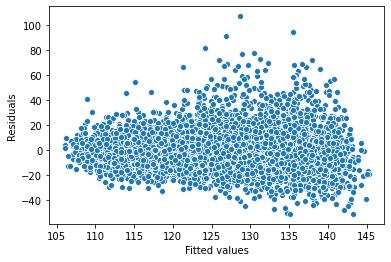

In [17]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

Below we show the plot of residuals on fitted values for the NHANES data. It appears that
we have a modestly increasing mean/variance relationship. That is, the scatter around the mean
blood pressure is greater when the mean blood pressure itself is greater.

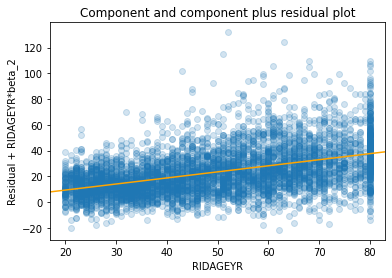

In [18]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import plot_ccpr
ax = plt.axes()
plot_ccpr(result, "RIDAGEYR", ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

12

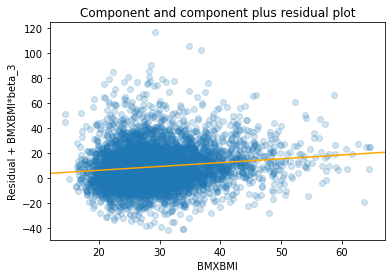

In [19]:
ax = plt.axes()
plot_ccpr(result, "BMXBMI", ax)
ax.lines[0].set_alpha(0.2)
ax.lines[1].set_color("orange")
12

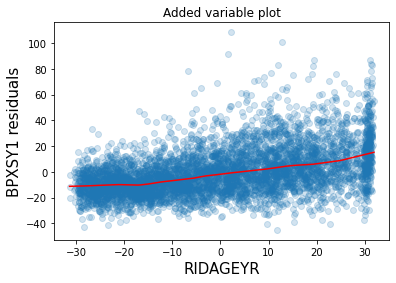

In [20]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess
# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()
fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

## Logistic Regression


we will fit a logistic regression.
The dependent variable (outcome) of this initial model is smoking status, and the only covariate
is gender. Thus, we are looking at gender as a predictor of smoking status.

we will work with the NHANES variable SMQ020,
which asks whether a person has smoked at least 100 cigarettes in their lifetime (if this is the case,
we say that the person has a “smoking history”)

In [23]:
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})

In [24]:
model = sm.GLM.from_formula("smq ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Wed, 05 Jan 2022   Deviance:                       6701.2
Time:                        23:48:09   Pearson chi2:                 5.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.042    -18.071      0.000      -0.837      -0.673
RIAGENDRx[T.Male]     0.8851      0.058     15.227      0.000       0.771       0.999
=====================================================================================
"""


To see the connection between logistic regression and the log odds statistic, note that the logis-
tic regression coefficient for male gender is exactly equal to the difference between the log odds
statistics for males and females:

As with linear regression, we can include multiple covariates in a logistic regression. Below we fit
a logistic regression for smoking status using age (RIDAGEYR) and gender as covariates.

In [26]:
model = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Wed, 05 Jan 2022   Deviance:                       6593.2
Time:                        23:54:04   Pearson chi2:                 5.10e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6166      0.095    -16.985      0.000      -1.803      -1.430
RIAGENDRx[T.Male]     0.8920      0.059     15.170      0.000       0.777       1.007
RIDAGEYR              0.0172      0.002     10.289      0.000       0.014       0.021
=====================================================================================
"""

Adding age to the model leads to a very small shift in the gender parameter (it changed from
0.885 to 0.892). In general, regression coefficients can change a lot when adding or removing other
variables from a model. But in this case the change is quite minimal. This fitted model suggests
that older people are more likely to have a history of smoking than younger people. The log odds
for smoking increases by 0.017 for each year of age. This effect is additive, so that comparing two
people whose ages differ by 20 years, the log odds of the older person smoking will be around
0.34 units greater than the log odds for the younger person smoking, adn the odds for the older
person smoking will be around exp(0.34) = 1.4 times greater than the odds for the younger
person smoking.
The greater


Next we fit a logistic regression model, again for smoking, including educational attainment as a
predictor. The educational attainment in NHANES is called DMDEDUC2, and we will recode it
so that the meaning of the levels becomes more clear. We will call the recoded variable DMDEDUC2x.

In [27]:
# Create a labeled version of the educational attainment variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

model = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5093
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Wed, 05 Jan 2022   Deviance:                       6402.4
Time:                        23:58:09   Pearson chi2:                 5.10e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.3060      0.114    -20.174      0.000      -2.530      -2.082
RIAGENDRx[T.Male]            0.9096      0.060     15.118      0.000       0.792       1.028
DMDEDUC2x[T.HS]              0.9434      0.090     10.521      0.000       0.768       1.119
DMDEDUC2x[T.SomeCollege]     0.8322      0.084      9.865      0.000       0.667       0.998
DMDEDUC2x[T.lt9]             0.2662      0.109      2.438      0.015       0.052       0.480
DMDEDUC2x[T.x9_11]           1.0986      0.107     10.296      0.000       0.889       1.308
RIDAGEYR                     0.0183      0.002     10.582      0.000       0.015       0.022
============================================================================================
"""

now we graphically represent the regression model for better understanding

Text(0, 0.5, 'Smoking')

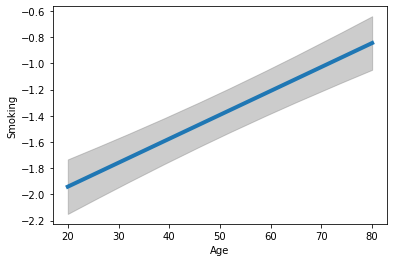

In [28]:
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
"DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1,
"DMDEDUC2x": "College", "BPXSY1": 120}
pr, cb, fv = predict_functional(result, "RIDAGEYR",
values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Smoking")

Text(0, 0.5, 'Smoking')

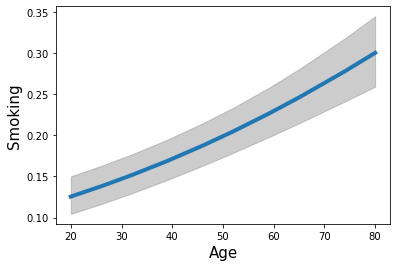

In [29]:
pr1 = 1 / (1 + np.exp(-pr))
cb1 = 1 / (1 + np.exp(-cb))
ax = sns.lineplot(fv, pr1, lw=4)
ax.fill_between(fv, cb1[:, 0], cb1[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age", size=15)
ax.set_ylabel("Smoking", size=15)